# Credit card fraud detection: a comprehensive comparison of undersampling and oversampling techniques for imbalanced data
The primary objective of this notebook is to explore different techniques for tackling the imbalanced dataset problem in the context of credit card fraud detection. We will experiment with various undersampling and oversampling methods, as well as synthetic sample generation techniques, to improve the performance of our classifiers. Additionally, we will examine the trade-offs between precision and recall in order to create an effective and reliable fraud detection system.

### Topics:
- Clean EDA with barplots, scatterplots and KDE plots
- Inter-feature correlation analysis
- PCA dimensionality reduction grid search
- Confusion matrix
- Evaluation metrics
- Custom classification reports
- Plotting precision-recall curves
- Undersampling techniques: RUS, Tomek Links, NCL, OSS
- Oversampling techniques: ROS, SMOTE, borderline SMOTE
- Machine learning
- Imbalanced data
- Decision trees

### Contents:
1. Introduction
2. Dataset overview
3. EDA
4. Correlation analysis
5. A second PCA reduction
6. Train-test split
7. Quick decision tree classifier and accuracy
8. Evaluation metrics
9. Undersampling techniques
10. Oversampling techniques
11. Conclusion

# Introduction

## Credit card fraud and its impact
Credit card fraud is a growing concern worldwide, as it causes significant financial losses for businesses, banks, and individuals. With the increasing adoption of digital payments and e-commerce, fraudsters have more opportunities to exploit security weaknesses and steal sensitive information. This not only results in monetary losses but also damages the reputation of financial institutions and erodes consumer trust.

Detecting and preventing credit card fraud is of paramount importance to minimize its negative impact. Machine learning techniques have shown great promise in identifying suspicious transactions and helping businesses and banks take proactive measures to mitigate fraud risks.

## Explanation of imbalanced data and its challenges
A common issue in fraud detection tasks is that the data is often highly imbalanced. This means that the number of fraudulent transactions is significantly lower than the number of legitimate transactions. In such cases, conventional machine learning models tend to be biased toward the majority class (legitimate transactions) and may perform poorly in detecting the minority class (fraudulent transactions).

The challenge lies in developing models that can accurately identify fraudulent transactions while minimizing false alarms. Imbalanced data poses difficulties in achieving this goal, as most classifiers are designed to maximize overall accuracy, which may not be an appropriate metric in such scenarios.

In this notebook, we will explore various techniques to address the class imbalance problem and evaluate their effectiveness in detecting credit card fraud. This will enable us to build more accurate and reliable models for fraud detection tasks, ultimately contributing to a more secure and trustworthy financial ecosystem.

# Dataset overview
## Import libraries and load the data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Tweaks for Seaborn
sns.set_style('whitegrid')

# Set numpy seed 
np.random.seed(42)

df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Description of dataset

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is 66mb in size and highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

This dataset also contains no missing values and requires no cleaning or preprocessing for our purposes.

# EDA
## Boxplots with class and amount

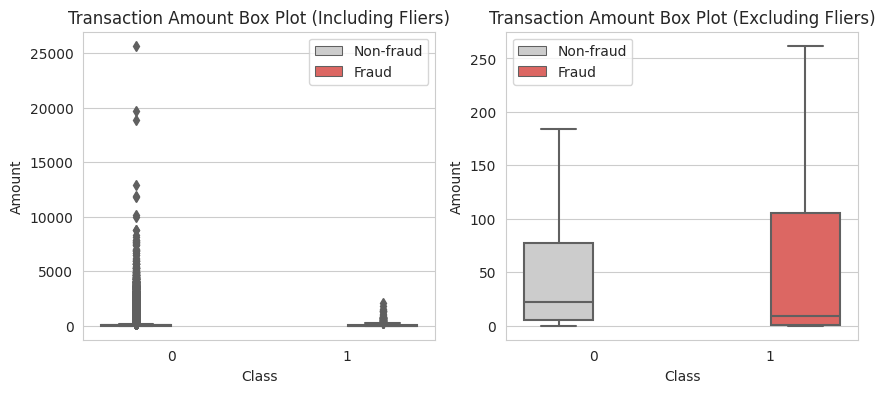

In [2]:
# Custom colors for our data

gray_color = "#CCCCCC" # Grey for regular txs
red_color = "#F0544F" # Red for fraudulent txs
blue_color = "#8CA6F2" # Blue for heatmap
gold_color = '#F2D98C' # Gold for heatmap
green_color = '#A4F28C'# Green for confusion matrix
white_color = '#FFFFFF' # White for confusion matrix

color_pal = [gray_color, red_color]

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            palette=color_pal,
            showfliers=True,
            ax=ax[0])

sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            palette=color_pal,
            showfliers=False,
            ax=ax[1])

# Add titles to the plots
ax[0].set_title("Transaction Amount Box Plot (Including Fliers)")
ax[1].set_title("Transaction Amount Box Plot (Excluding Fliers)")

# Update legend labels
legend_labels = ['Non-fraud', 'Fraud']
for i in range(2):
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, legend_labels)


plt.show()

#### Observations:
- The first plot shows the transaction amounts including outliers, the second without outliers.
- From the second plot, we can see that fraudulent transactions have a lower median value.
- Fraudulent transactions also have a greater interquartile range.
- There are no fraudulent transactions for over 3000, so very large transactions are unlikely to be fraudulent.

## Scatterplot showing amounts over time

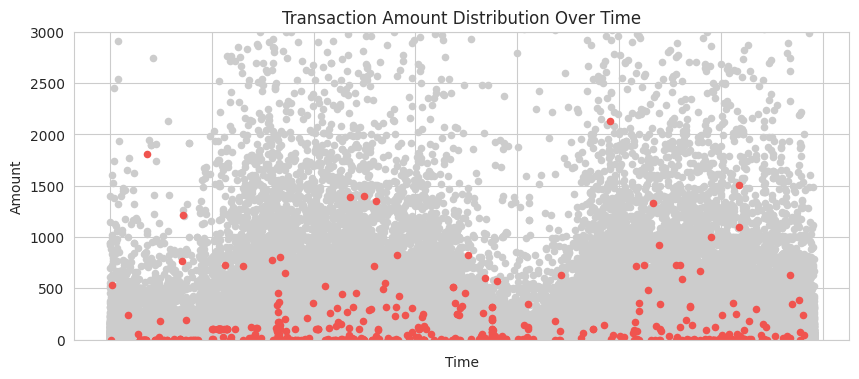

In [3]:
f, ax = plt.subplots(figsize=(10, 4))

sns.scatterplot(data=df.loc[df.Class==0], 
                x='Time', 
                y='Amount', 
                color=gray_color,
                s=30,
                alpha=1,
                linewidth=0)

ax.set(xlabel=None, xticklabels=[])
plt.ylim(0, 3000)


sns.scatterplot(data=df.loc[df.Class==1], 
                x='Time', 
                y='Amount', 
                color=red_color,
                s=30,
                alpha=1,
                linewidth=0)
plt.ylim(0, 3000)

# Add title to the plot
ax.set_title("Transaction Amount Distribution Over Time")

plt.show()

#### Observations:
- By just looking at the amount and time, fraudulent transactions appear to be very well hidden amongst the noise of non-fraudulent transactions.

## KDE plots comparing distribution of each feature for each class
Amount and time are certainly the easiest features to interpret, since all other features are the output of a PCA transformation.
We can look at their distributions using KDE plots, which plots the density of the feature similarly to a histogram, only using a continuous estimation.

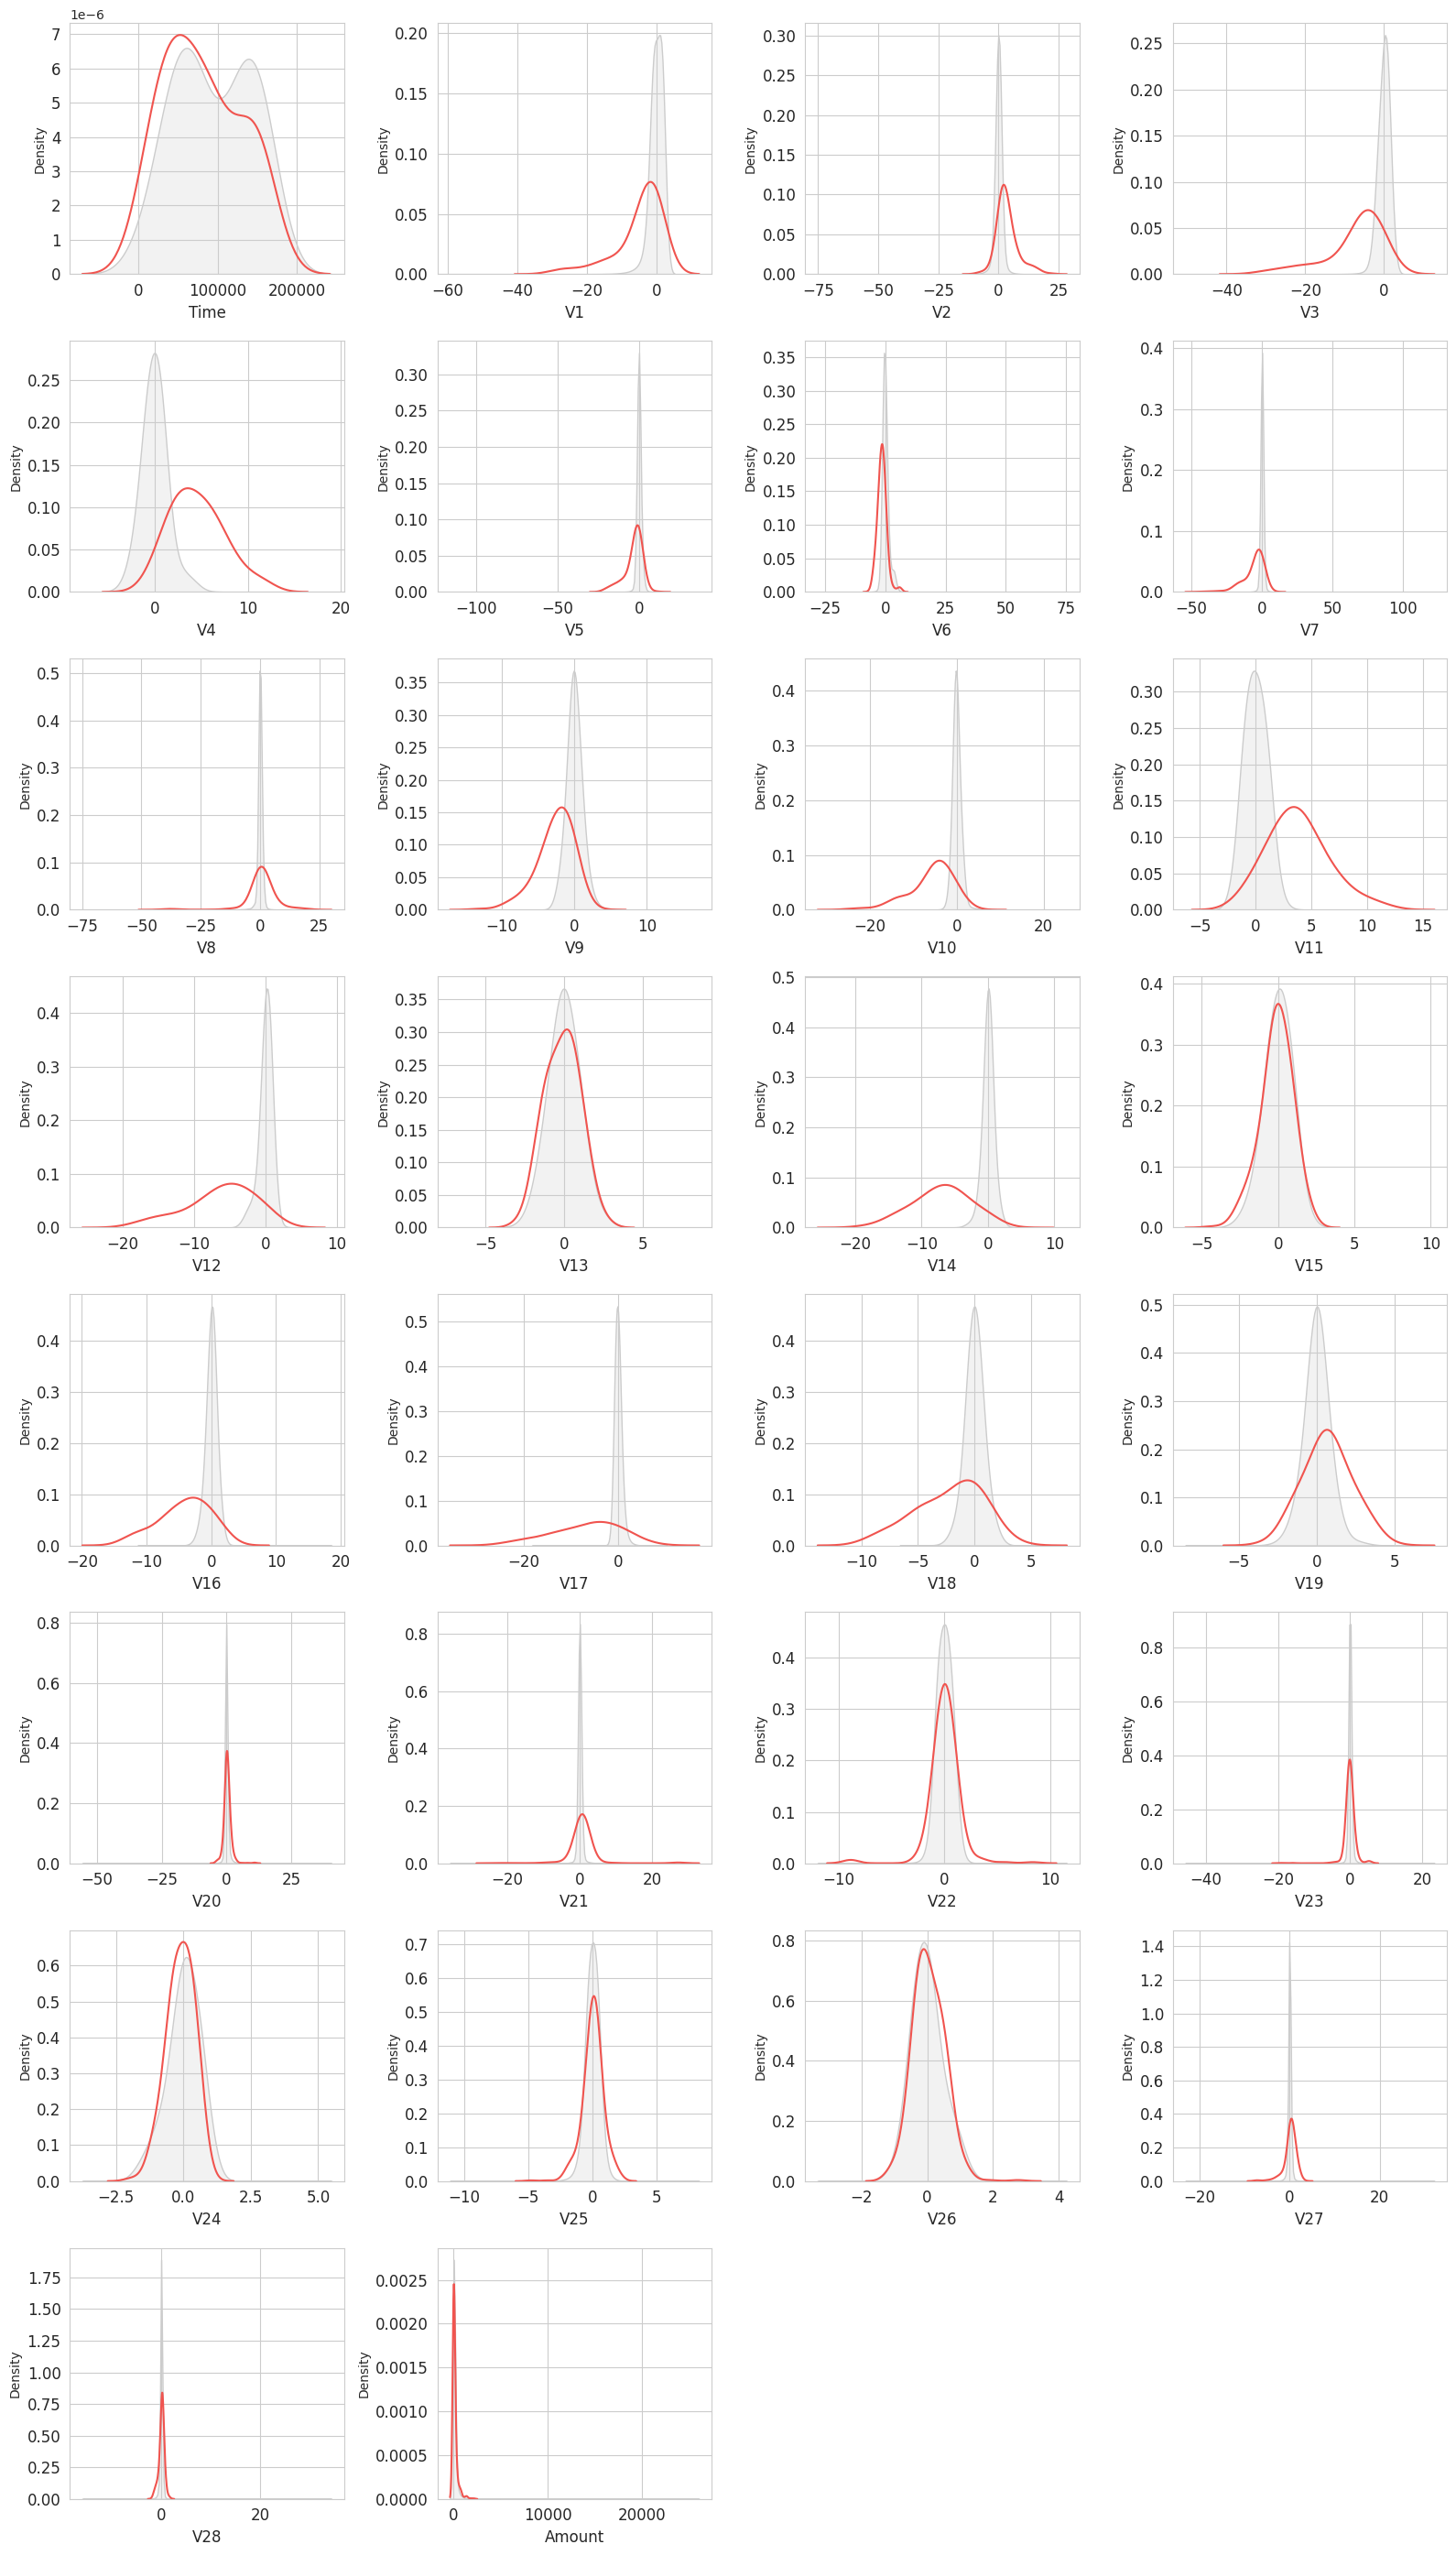

In [4]:
var = df.columns.values

t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

num_features = len(var)
num_rows = num_features // 4 + int(num_features % 4 != 0)

fig, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 28))

for idx, feature in enumerate(var):
    row = idx // 4
    col = idx % 4
    
    sns.kdeplot(t0[feature], bw_method=0.5, label="Class = 0", color=gray_color, fill=True, warn_singular=False, ax=ax[row, col])
    sns.kdeplot(t1[feature], bw_method=0.5, label="Class = 1", color=red_color, warn_singular=False, ax=ax[row, col])
    
    ax[row, col].set_xlabel(feature, fontsize=12)
    ax[row, col].tick_params(axis='both', which='major', labelsize=12)

# Remove any unused subplots + class
for remaining_ax in ax.flatten()[num_features-1:]:
    remaining_ax.remove()    
    
plt.tight_layout()
plt.show()

#### Observations:
- Some of the features' distributions are almost identical between fraudulent and non-fraudulent transactions.
- Other feature distributions have clear differences in mean and flatness, which will be useful for predictions.

# Correlation analysis
Let's look at feature inter-correlations. It's possible we can further reduce the dimensionality of this dataset, as it's currently very very large, with almost 300,000 samples each with 30 features.

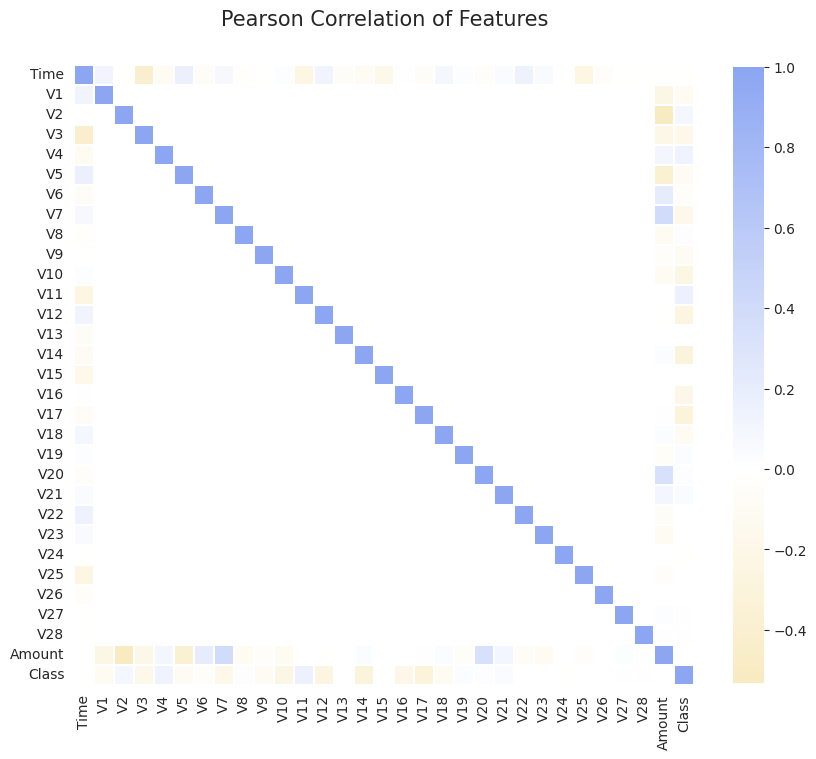

In [5]:
from matplotlib.colors import LinearSegmentedColormap
f, ax = plt.subplots(figsize = (10, 10))

colors = [gold_color, "#ffffff", blue_color]
color_positions = [1, 0, -1]

color_map = LinearSegmentedColormap.from_list("Custom", colors, N=256, gamma=1.0)

sns.heatmap(
    df.corr('pearson'), 
    cmap=color_map,
    square=True, 
    center=0,
    cbar_kws={'shrink': .8}, 
    ax=ax,
    annot=False, 
    linewidths=0.1, vmax=1.0, linecolor='white',
)

plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()

#### Observations
- The PCA features have little to no inter-correlation.
- Most of the PCA features correlate weakly with the transaction time, transaction amount, or both.
- It's likely we can largely reduce the size of this dataset, greatly reducing the number of features.

## The curse of dimensionality
The curse of dimensionality is a phenomenon that arises when working with high-dimensional data. As the number of dimensions in a dataset increases, the complexity and computational requirements of various algorithms grow exponentially, making it more difficult to process and analyze the data. This problem is particularly prevalent in machine learning, where high-dimensional datasets can lead to poor model performance, overfitting, and increased training time.

In the context of our problem, we are dealing with a large dataset containing 30 features, which may not seem like a lot, but as we add more dimensions, the data points become more and more sparse in the feature space. This sparsity makes it challenging for a classifier model to identify meaningful patterns and relationships between the features and the target variable (fraud or non-fraud in our case).

To overcome the curse of dimensionality, we can apply dimensionality reduction techniques such as Principal Component Analysis (PCA). By reducing the number of dimensions in our dataset, we can improve the efficiency and effectiveness of our classifier model, allowing it to learn better. Moreover, a reduced feature space will make it easier for us to visualize and understand the relationships between the features and the target variable, ultimately leading to better decision-making and insights.

# PCA Dimensionality Reduction
Our dataset has already been reduced using PCA, but we are going to reduce it again, as it seems that it could still benefit from further reduction.

Since we don't know the optimal number of components, we are going to manually search each possible number of components.

We're also not going to include Time, or Amount in this reduction, as these features may come in useful later for visualization purposes.

## Decision tree classifier
In this notebook, we're going to create many decision trees, with the same hyperparameters.
In unbalanced data problems, using more complex models (in this case, max_depth=20 which is very deep) gives us more flexibility later to use varying decision thresholds. 
These models may be prone to overfitting, but we will address this later.

In [6]:
from sklearn.tree import DecisionTreeClassifier

def create_dtree(prob=False):
    '''
    This function returns a decision tree classifer with hyperparameters defined as below.
    '''
    classifier = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        min_samples_split=20, 
        min_samples_leaf=10,  
        max_features=None,
        random_state=42)
    
    def predict(X):
        if prob:
            return classifier.predict_proba(X)[:, 1] # Return probabilities of the positive class
        else:
            return classifier.predict(X)
    
    # Allow the classifier to return probabilities, allowing for evaluation metrics such as ROC-AUC to work properly
    classifier.custom_predict = predict
    return classifier
    
    return classifier

In [7]:
# Making DataFrames for PCA features and non-PCA features. 
# We will use only the PCA features in our PCA reduction.
non_pca_features = ['Class','Time','Amount']
pca_features_df = df.drop(columns=non_pca_features)
non_pca_features_df = df[non_pca_features]
y = df['Class']

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Perform a kfold cross validation for better accuracy
skf = StratifiedKFold(n_splits=5)

dtc = create_dtree()

pipeline = Pipeline(
                    [('pca', PCA()),
                     ('dtc', dtc)  
])

parameters = {}
parameters['pca__n_components'] = [i for i in range(1, 28)]

gs = GridSearchCV(pipeline, parameters, scoring = 'average_precision', cv=skf, n_jobs=-1)
gs.fit(pca_features_df, y)  

pca_gs_results = pd.DataFrame()
pca_gs_results['nComponents'] = [i for i in range(1, 28)]
pca_gs_results.set_index('nComponents', drop=False, inplace=True)
pca_gs_results['Avg Precision'] = gs.cv_results_['mean_test_score']
pca_gs_results['Rank'] = gs.cv_results_['rank_test_score']
pca_gs_results['AvgTime'] = gs.cv_results_['mean_fit_time']

feature_names = ['Avg Precision', 'Rank', 'AvgTime']

pca_gs_results[feature_names]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Avg Precision,Rank,AvgTime
nComponents,,,
1,0.015783,27,2.732839
2,0.138130,26,3.428899
3,0.298289,25,3.392784
4,0.503670,24,3.898472
5,0.510170,23,4.631496
6,0.535743,20,5.469685
7,0.532672,21,6.511018
8,0.528659,22,6.786398
9,0.547416,19,7.673206


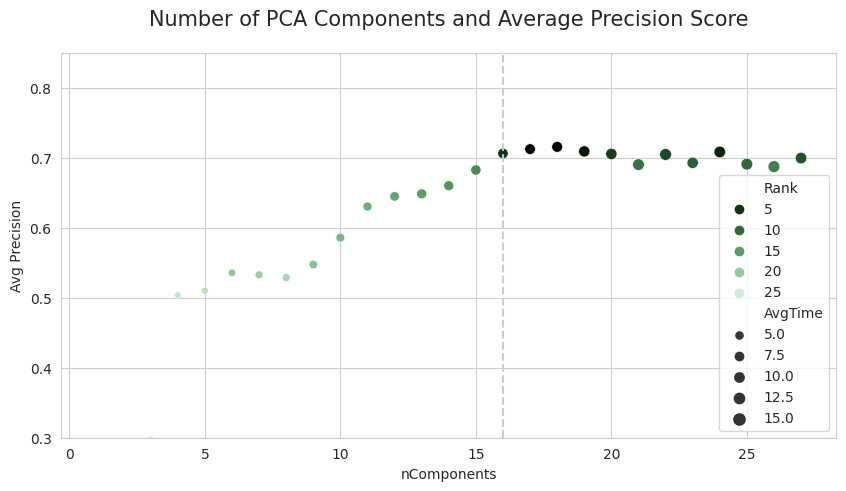

In [8]:
f, ax = plt.subplots(figsize=(10,5))

ax.axvline(x=16, ymin=0, ymax=1, c="#cccccc", ls='--', linewidth=1.5)

color_map = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

sns.scatterplot(data=pca_gs_results, x='nComponents', y='Avg Precision', hue='Rank',  palette=color_map, size='AvgTime', ax=ax)



plt.ylim(0.3, 0.85)
plt.legend(loc='lower right')
plt.title('Number of PCA Components and Average Precision Score', y=1.05, size=15)

plt.show()

#### Observations:
- Performing a PCA reduction to x dimensions resulted in the best F1 score from our decision tree classifier.
- There is a significant drop in performance for each dimension removed below 10 dimensions.
- At a glance, a reduction to x dimensions seems like a good trade off between number of dimensions and performance.
- Were we most focused on creating an accurate model, we would choose the 20 dimensional PCA reduction, but since the main objective of this project is dealing with unbalanced data and we're later going to be more interested in increasing computational efficiency, we will choose the x dimensional reduction.

## Applying a 16D PCA reduction to our DataFrame


In [9]:
from sklearn.decomposition import PCA

non_pca_features = ['Time','Amount', 'Class']
pca_features_df = df.drop(columns=non_pca_features)
non_pca_features_df = df[non_pca_features]
y = df['Class']

n_pca_features = 16

pca = PCA(n_components=n_pca_features)
pca.fit(pca_features_df)
pca_df = pd.DataFrame(pca.transform(pca_features_df))
pca_df.columns = [f'PC{i}' for i in range(1, n_pca_features+1)]


pca_df[non_pca_features] = df[non_pca_features]

pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC1     284807 non-null  float64
 1   PC2     284807 non-null  float64
 2   PC3     284807 non-null  float64
 3   PC4     284807 non-null  float64
 4   PC5     284807 non-null  float64
 5   PC6     284807 non-null  float64
 6   PC7     284807 non-null  float64
 7   PC8     284807 non-null  float64
 8   PC9     284807 non-null  float64
 9   PC10    284807 non-null  float64
 10  PC11    284807 non-null  float64
 11  PC12    284807 non-null  float64
 12  PC13    284807 non-null  float64
 13  PC14    284807 non-null  float64
 14  PC15    284807 non-null  float64
 15  PC16    284807 non-null  float64
 16  Time    284807 non-null  float64
 17  Amount  284807 non-null  float64
 18  Class   284807 non-null  int64  
dtypes: float64(18), int64(1)
memory usage: 41.3 MB


## Data type optimization
Let's reduce the size of our dataset by optimizing the data types.
All PCA values will use float32, amount only needs float16, and our binary Class labels just need uint8 to hold a simple 1 or 0.

In [10]:
feature_dtype_map = {
    'PC1': 'float32',
    'PC2': 'float32',
    'PC3': 'float32',
    'PC4': 'float32',
    'PC5': 'float32',
    'PC6': 'float32',
    'PC7': 'float32',
    'PC8': 'float32',
    'PC9': 'float32',
    'PC10': 'float32',
    'PC11': 'float32',
    'PC12': 'float32',
    'PC13': 'float32',
    'PC14': 'float32',
    'PC15': 'float32',
    'PC16': 'float32',
    'Time': 'float32',
    'Amount': 'float16',
    'Class': 'uint8',
}

pca_df = pca_df.astype(feature_dtype_map)
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC1     284807 non-null  float32
 1   PC2     284807 non-null  float32
 2   PC3     284807 non-null  float32
 3   PC4     284807 non-null  float32
 4   PC5     284807 non-null  float32
 5   PC6     284807 non-null  float32
 6   PC7     284807 non-null  float32
 7   PC8     284807 non-null  float32
 8   PC9     284807 non-null  float32
 9   PC10    284807 non-null  float32
 10  PC11    284807 non-null  float32
 11  PC12    284807 non-null  float32
 12  PC13    284807 non-null  float32
 13  PC14    284807 non-null  float32
 14  PC15    284807 non-null  float32
 15  PC16    284807 non-null  float32
 16  Time    284807 non-null  float32
 17  Amount  284807 non-null  float16
 18  Class   284807 non-null  uint8  
dtypes: float16(1), float32(17), uint8(1)
memory usage: 19.3 MB


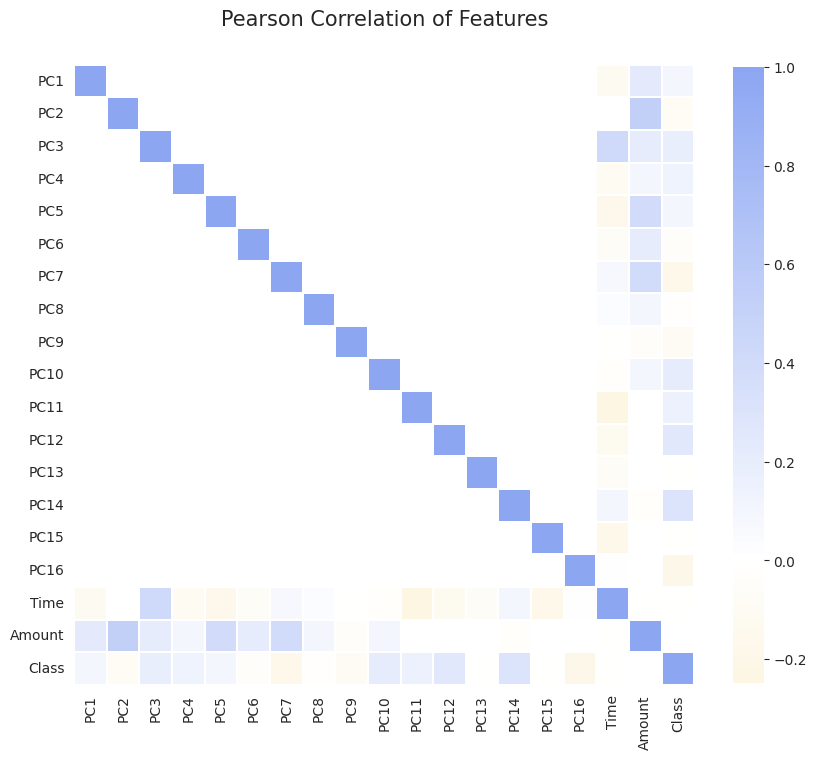

In [11]:
from matplotlib.colors import LinearSegmentedColormap
f, ax = plt.subplots(figsize = (10, 10))

colors = [gold_color, "#ffffff", blue_color]
color_positions = [1, 0, -1]

color_map = LinearSegmentedColormap.from_list("Custom", colors, N=256, gamma=1.0)

sns.heatmap(
    pca_df.corr('pearson'), 
    cmap=color_map,
    square=True, 
    center=0,
    cbar_kws={'shrink': .8}, 
    ax=ax,
    annot=False, 
    linewidths=0.1, vmax=1.0, linecolor='white',
)

plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()

# Train-test split
- Perform a train/test split on the data
- Prepare to be used in a decision tree classifier

In [12]:
from sklearn.model_selection import train_test_split

target_column = pca_df.Class
train_df, test_df = train_test_split(pca_df, 
                                     stratify=target_column,
                                     test_size=0.203, # 0.203 gives us a nice round 100 test fraud txs
                                     shuffle=True,
                                     random_state=42)

X_train = train_df.drop(columns='Class')
y_train = train_df['Class']

X_test = test_df.drop(columns='Class')
y_test = test_df['Class']

# We're creating a temporary DataFrame so we can check the results of our train-test split
train_count_df = train_df.loc[:, ['Amount', 'Class']].groupby(['Class']).count()
train_count_df['Percent'] = 100 * train_count_df['Amount'] / train_count_df['Amount'].sum()
train_count_df.index = ['Non-Fraud', 'Fraud']
train_count_df

test_count_df = test_df.loc[:, ['Amount', 'Class']].groupby(['Class']).count()
test_count_df['Percent'] = 100 * test_count_df['Amount'] / test_count_df['Amount'].sum()
test_count_df.index = ['Non-Fraud', 'Fraud']
test_count_df

c_cols = ['Train Amount', 'Train Percent', 'Test Amount', 'Test Percent']
combo_df = pd.concat([train_count_df, test_count_df], axis=1)
combo_df.columns = c_cols
combo_df

,Train Amount,Train Percent,Test Amount,Test Percent
Non-Fraud,226599,99.827306,57716,99.827037
Fraud,392,0.172694,100,0.172963


#### Observations:
- We've got approximately 227,000 samples in our train DataFrame and 58,000 samples in our test DataFrame.
- In both frames, only 0.173% of transactions are fraudulent.
- Fraudulent transactions are majorly underrepresented. 

## Scaling, normalizing, and removing anomalies
Since we're using a decision tree classifier, it is not necessary to scale or normalize our data.

Decision trees are also robust to anomalies, so this step is also not necessary.

# Quick decision tree classifier and accuracy
Let's make a quick implementation of a decision tree to see how a simple model performs without any effor to adress the imbalanced data problem:

In [13]:
from sklearn.metrics import accuracy_score

dtc = create_dtree(prob=True)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Accuracy: {100*accuracy_dt:.3f}% ')

Accuracy: 99.938% 


#### Observations:
- An accuracy of over 99.9% is pretty good right?
- This is until we consider that the dataset is 99.8% non-fraud, meaning a model that trivially predicts all transactions are non-fraudulent will achieve an accuracy of 99.8%.
- From this we can conclude that accuracy alone is not a sufficient way to evaluate this model.

## The confusion matrix
A confusion matrix is like a performance snapshot for our classification model, providing a clear and concise overview of its predictions compared to the actual class labels. Within the matrix, we can see four components:

- True Positive (TP): Instances where the model correctly identified fraudulent transactions.
- False Positive (FP): Cases where the model incorrectly predicted non-fraudulent transactions to be fraudulent (also known as a type I error).
- True Negative (TN): Instances where the model correctly identified non-fraudulent transactions.
- False Negative (FN): Cases where the model incorrectly predicted fraudulent transactions to be non-fraudulent (also known as a type I error).

The confusion matrix reveals valuable insights into our model's ability to distinguish between classes, helping us identify areas for improvement.

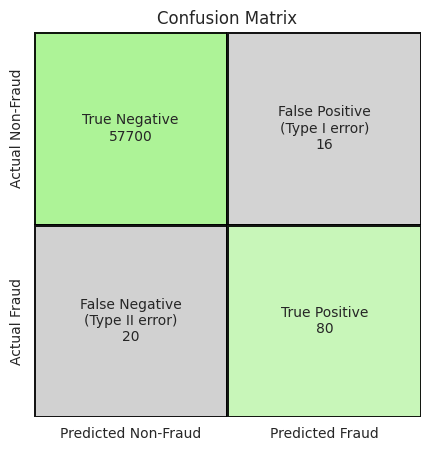

In [14]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, figsize=(5, 5)):
    cm = confusion_matrix(y_true, y_pred)

    group_names = ["True Negative","False Positive\n(Type I error)","False Negative\n(Type II error)","True Positive"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2, 2)

    colors = [green_color, white_color, gray_color]
    color_positions = [1, 0, -1]

    cm_map = LinearSegmentedColormap.from_list("Custom", colors, N=256, gamma=1.0)

    custom_cm = [[-1, min(1, cm[0,1]/100)],[cm[1,0]/100, -cm[1,1]/100]]

    plt.figure(figsize=figsize)
    sns.heatmap(custom_cm, 
                annot=labels, 
                cmap=cm_map, 
                cbar=False, 
                fmt='', 
                alpha=0.9,
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'],
                linewidths=2, 
                linecolor='black')

    plt.title('Confusion Matrix')
    return plt
    
plt = plot_confusion_matrix(y_test, y_pred)
plt.show()

## Interpreting our confusion matrix
Imagine we work for Visa, which processes thousands of transactions daily. Our model serves as a vigilant supervisor that monitors every transaction, with access to all the relevant information, including our PCA features, Time, and Amount. The supervisor can cancel a transaction if it is suspected to be fraudulent.

- On a particular day, our customers make 57,816 transactions.
- Out of these transactions, 100 are fraudulent, implying unauthorized individuals carried them out (0.17%).
- The supervisor (model) successfully identifies 80 out of the 100 fraudulent transactions.
- Unfortunately, 20 fraudulent transactions go undetected by the supervisor.
- In pursuit of preventing fraud, the supervisor mistakenly accuses 16 innocent customers of fraudulent transactions. These customers may have made transactions in a suspicious manner, such as in a foreign country or involving a large sum.
- Despite these false accusations, the supervisor correctly identifies 57,702 legitimate transactions.
- When the supervisor encounters a fraudulent transaction, there's a 80% chance it will be detected.
- When reviewing a normal transaction, the supervisor will mistakenly label it as fraudulent 0.028% of the time.
- Out of the 87 transactions flagged as fraudulent, 83% are genuinely fraudulent, while 16% are false alarms involving unsuspecting customers.
- With an 80% detection rate, potential fraudsters might think twice before attempting unauthorized transactions.
- The daily false accusations of 16 regular customers indicate that the supervisor's approach may be slightly overzealous. However, the overall effectiveness in detecting fraud reassures customers that their cards are secure.

# Evaluation Metrics
We just said that accuracy alone is an insufficient way to assess the performance of a model, but failed to offer any alternative metrics. In this section, we're going to discuss more appropriate methods of evaluation model performance.

## Accuracy 
#### (number correct / total)
The Accuracy supervisor is like a passive observer, indifferent and detached. Her primary strength lies in the high percentage of correct non-cancellations, but she completely ignore actual fraudulent transactions. Customers will never have any transactions cancelled which is clearly desirable, however, the security of the bank is compromised. The supervisor's inaction allows fraudulent activities to continue unchecked.

## Precision 
#### (number guessed correctly / total number guessed)
The Precision supervisor aims to catch fraudsters but is cautious about falsely accusing law-abiding customers. This supervisor takes pride in accurately detecting frauds while rarely making false accusations. When the precision supervisor flags a transaction as fraudulent, it's highly likely to be true. Their strength lies in the correct identification of fraudulent transactions. While this supervisor has a high success rate, they may overlook some potentially fraudulent transactions due to their primary focus on maintaining a low rate of false accusations. Customers like this supervisor, as he rarely cancels their transactions, however he's no match for a cunning fraudster.

## Recall 
#### (number of fraudulent transactions caught/total number of fraudulent transactions)
The Recall supervisor can be imagined as extremely vigilant, focused on capturing every fraudulent transaction that occurs. This supervisor takes pride in identifying nearly all fraudsters, but at the cost of mistakenly accusing numerous law-abiding customers. Any transaction that appears remotely suspicious will be canceled, leading to minimal fraud. However, customers may become frustrated, knowing that any irregularities in their transactions could result in a cancellation. Fraudsters might be discouraged from attempting any mischief with this supervisor in charge, but customers could find the experience frustrating and inconvenient.

## Specificity 
#### (number of regular customers not accused/total number of customers)
The Specificity supervisor can be thought of as a friendly observer, prioritizing the customer experience by avoiding false accusations. This supervisor is focused on ensuring that law-abiding customers are not inconvenienced by erroneous cancellations. They are more lenient with suspicious transactions, giving customers the benefit of the doubt. While this approach fosters a positive customer experience, it may inadvertently allow some fraudulent transactions to go unnoticed. With the Specificity supervisor in charge, customers can enjoy a seamless transaction process, but the risk of undetected fraud may be slightly higher.

## F1 
#### (2 * (precision * recall) / (precision + recall))
The F1 supervisor can be seen as a clever, practical, and balanced decision maker, striking a balance between catching fraudsters and minimizing false accusations. This supervisor is adept at identifying fraudulent transactions while keeping the number of false cancellations low. They consider both the precision and recall aspects of their decisions to achieve a well-rounded approach to fraud detection. With the F1 supervisor in charge, customers can trust that their transactions will be processed smoothly, and the majority of fraudsters will be caught. This balanced approach ensures a high level of security without unduly impacting the customer experience. The weakness of the F1 supervisor lies in his opinion that both recall and precision are equally important, which is not always the case.

## Precision-Recall
#### (Recall plotted against precision at varying decision thresholds)
The Precision-Recall (PR) supervisor can be seen as a discerning and adaptable strategist, focusing on the challenges posed by class imbalance or when the positive class is of particular importance. He is dedicated to gaining a deep understanding of his decision-making performance by assessing his ability to differentiate between fraudulent and genuine transactions across various decision thresholds. His goal is to achieve a high precision and recall rate, paying special attention to the minority class.

By carefully analyzing his performance across these thresholds, the PR supervisor can optimize his decision-making process to strike the perfect balance between capturing fraudsters and minimizing the number of false accusations. This targeted approach ensures strong fraud detection and preserves customer trust, especially when dealing with imbalanced datasets or when the consequences of false positives and false negatives differ significantly.

## Custom classification report:
Let's create a function that allows us to determine how a model has performed, using the aforementioned metrics.

Note that average precision is calcuated as the integral of the precision recall curve, resulting in an average precision value for all possible recall values.

In [15]:
from sklearn.metrics import recall_score, precision_score, f1_score, average_precision_score

def classification_report(y_true, y_pred, y_prob=None, name="classifier"):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    if y_prob is not None:
        avg_precision = average_precision_score(y_true, y_prob)
    else:
        avg_precision = None

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    metrics = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'Specificity': specificity,
        'F1': f1,
        'Avg Precision': avg_precision
    }

    report_df = pd.DataFrame(metrics, index=[name])

    return report_df

dtc = create_dtree(prob=True)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_prob = dtc.custom_predict(X_test)

classification_report(y_test, y_pred, y_prob, "Decision Tree classifier")

,Accuracy,Recall,Precision,Specificity,F1,Avg Precision
Decision Tree classifier,0.999377,0.8,0.833333,0.999723,0.816327,0.800055


## Plotting a precision-recall curve
Let's plot a precision-recall curve for our classifier, highlighting some good possible strategies our model could employ, balancing recall with precision.

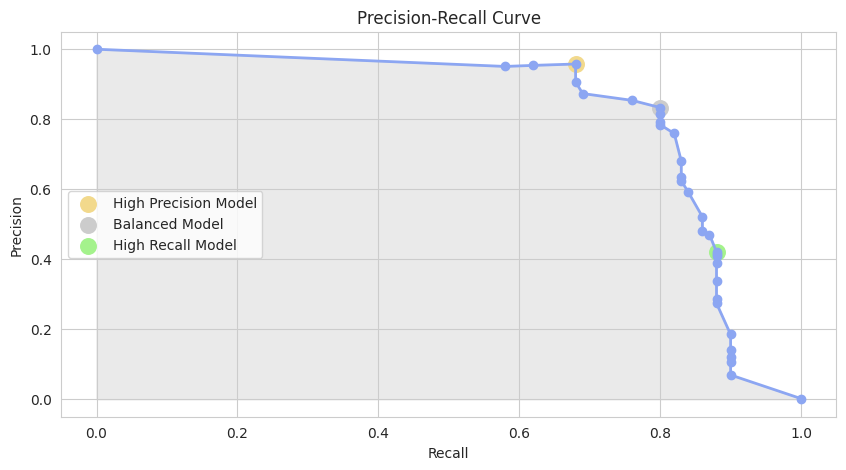

High precision model:	Precision: 0.958	Recall:  0.680
Balanced model:		Precision: 0.833	Recall:  0.800
High recall model:	Precision: 0.421	Recall:  0.880


In [16]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

f, ax = plt.subplots(figsize=(10, 5))
plt.plot(recall, precision, marker='.', color=blue_color, linewidth=2, markersize=12)
plt.fill_between(recall, precision, alpha=0.4, color=gray_color)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add a gold dot to highlight the model with excellent precision and good recall
plt.scatter(recall[-4], precision[-4], color=gold_color, marker='.', s=500, label='High Precision Model')
# Add a gray dot to highlight the model with balanced performance
plt.scatter(recall[-8], precision[-8], color=gray_color, marker='.', s=500, label='Balanced Model')
# Add a red dot to highlight the model with excellent recall and good precision
plt.scatter(recall[-20], precision[-20], color=green_color, marker='.', s=500, label='High Recall Model')

plt.legend(loc='center left')

plt.show()

print(f"High precision model:\tPrecision: {precision[-4]:.3f}\tRecall:  {recall[-4]:.3f}")
print(f"Balanced model:\t\tPrecision: {precision[-8]:.3f}\tRecall:  {recall[-8]:.3f}")
print(f"High recall model:\tPrecision: {precision[-20]:.3f}\tRecall:  {recall[-20]:.3f}")


#### Observations:
- The Precision-Recall curve illustrates the trade-off between recall and precision for various decision thresholds, representing potential models for deployment.
- As recall increases, precision generally decreases, indicating a balance must be struck between these two metrics.
- This curve can guide us in selecting the most suitable model based on our specific objectives. For instance:
- The high-recall model captures the majority of fraud cases but may result in a tolerable loss of precision.
- The high-precision model minimizes false accusations of innocent customers at the cost of potentially missing some fraud cases.
- The balanced model strikes a compromise between precision and recall, optimizing overall performance.
- These three distinct models are highlighted on the plot: high precision with lower recall, balanced high precision and recall, and lower precision with higher recall.
- The choice of model depends on the use case and priorities:
- To prioritize catching frauds while accepting some false positives, we can opt for the high-recall model.
- To prioritize avoiding false accusations at the expense of missing some frauds, we can select the high-precision model.
- For a balanced approach, we can choose the model with optimal precision and recall trade-off.

# Undersampling Techniques
Undersampling aims to train the model on a more balanced dataset by reducing the majority class instances. For us, this is similar to training a fraud detecting supervisor on datasets where there is a higher proportion of fraudulent transactions. Since the supervisor is exposed to more fraud cases during their training, they are likely to have better recall compared to algorithms trained on datasets with fewer fraudulent transactions. In the case of undersampling, this is achieved by removing non-fraudulent transactions from the dataset. 

These supervisors may overestimate the number of fraudulent transactions and end up falsely flagging many legitimate transactions. Despite this, we can expect these supervisors to catch most of the fraudulent transactions, as their training has prepared them to be more vigilant in identifying suspicious activities.

## Undersampling method: Random undersampling
This method is the most simple and involves randomly removing instances from the majority class to reduce its representation. While straightforward to implement, random undersampling can lead to loss of potentially important information, as it discards instances from the majority class

We're going to try various undersampling ratios, where we're adjusting the ratio of non-fraudulent transactions to fraudulent transactions.

We will start with the original ratio of 577 : 1, and slowly decrease it.

In [17]:
from imblearn.under_sampling import RandomUnderSampler

ratios = [577, 550, 525, 500, 450, 400, 350, 300, 250, 200, 150, 100, 50, 25, 15, 10, 5, 2, 1]

report_df = None

rus = RandomUnderSampler(sampling_strategy='auto')

# Initialize the classifier we want to use
dtc = create_dtree(prob=True)

for ratio in ratios:
    # Calculate the number of majority class samples for the current ratio
    num_majority_samples = int(y_train.sum() * ratio)
    
    # Perform random undersampling with the given ratio
    rus = RandomUnderSampler(sampling_strategy={0: num_majority_samples, 1: y_train.sum()}, random_state=42)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    # Train the model on the resampled dataset
    dtc.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test dataset
    y_pred = dtc.predict(X_test)
    y_prob = dtc.custom_predict(X_test)
    
    if report_df is None:
        report_df = classification_report(y_test, y_pred, y_prob, f"{ratio}x undersampled")
    else:
        report_df = pd.concat([report_df, classification_report(y_test, y_pred, y_prob, f"{ratio}x undersampled")], axis=0)
    
report_df['Ratio'] = ratios
report_df

,Accuracy,Recall,Precision,Specificity,F1,Avg Precision,Ratio
577x undersampled,0.999377,0.80,0.833333,0.999723,0.816327,0.800055,577
550x undersampled,0.999377,0.80,0.833333,0.999723,0.816327,0.787844,550
525x undersampled,0.999360,0.79,0.831579,0.999723,0.810256,0.779047,525
500x undersampled,0.999360,0.79,0.831579,0.999723,0.810256,0.777560,500
450x undersampled,0.999325,0.74,0.850575,0.999775,0.791444,0.772152,450
400x undersampled,0.999377,0.78,0.847826,0.999757,0.812500,0.801441,400
350x undersampled,0.999274,0.79,0.790000,0.999636,0.790000,0.800852,350
300x undersampled,0.999239,0.76,0.791667,0.999653,0.775510,0.800703,300
250x undersampled,0.999066,0.80,0.701754,0.999411,0.747664,0.790558,250
200x undersampled,0.999152,0.83,0.721739,0.999446,0.772093,0.724432,200


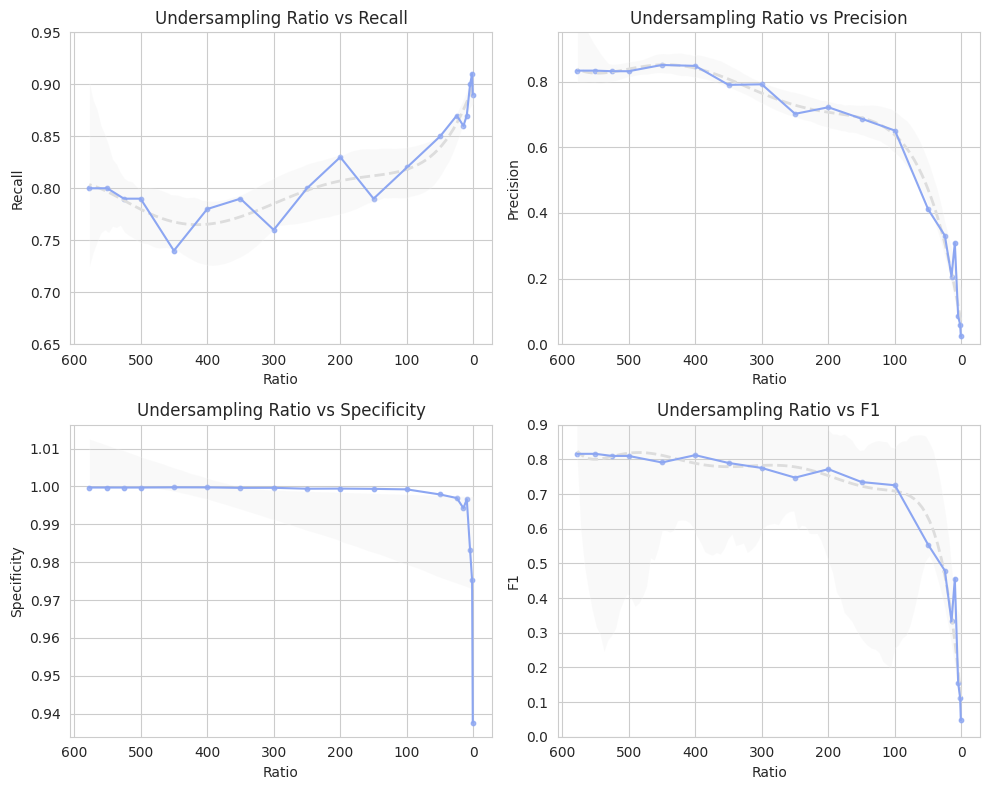

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Ratio against Recall
sns.regplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], order=5, scatter=True, color='#dddddd', line_kws={'linestyle':'--', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], color=blue_color)
axes[0, 0].invert_xaxis() # flip the x-axis
axes[0, 0].set_ylim([0.65, 0.95]) # set y-axis limits
axes[0, 0].set_title("Undersampling Ratio vs Recall")

# Ratio against Precision
sns.regplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], order=5, scatter=True, color='#dddddd', line_kws={'linestyle':'--', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], color=blue_color)
axes[0, 1].invert_xaxis() # flip the x-axis
axes[0, 1].set_ylim([0, 0.95]) # set y-axis limits
axes[0, 1].set_title("Undersampling Ratio vs Precision")

# Ratio against Specificity
sns.regplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], order=1, scatter=True, color='#dddddd', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], color=blue_color)
axes[1, 0].invert_xaxis() # flip the x-axis
axes[1, 0].set_title("Undersampling Ratio vs Specificity")

# Ratio against F1
sns.regplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], order=7, scatter=True, color='#dddddd', line_kws={'linestyle':'--', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], color=blue_color)
axes[1, 1].invert_xaxis() # flip the x-axis
axes[1, 1].set_ylim([0, 0.9]) # set y-axis limits
axes[1, 1].set_title("Undersampling Ratio vs F1")

# Adjust the layout
plt.tight_layout()
plt.show()

#### Observations:
- We can see recall improves as we decrease the ratio of the majority class to minority class, that is to say, the more non-fraudulent transactions we remove, the better the model is able to catch fraudsters.
- Precision however decreases as we decrease the ratio of the majority class to minority class, meaning that as we remove non-fraudulent transactions from our training dataste, the more likely we are to cancel innocent transactions.
- Due to the extremely imbalanced data, specificity does not plot very clearly. We can see around a 50x undersampling, the specificity begins to drop quickly.
- The F1 score gives us a good overview of model performance. After around a 100x undersampling, performance appears to decrease rapidly as precision drops, but before then we have many reasonable performance points we could choose from.

## Comparing undersampling methods
Let's make a DataFrame that stores the results of each of these undersampling methods, as well as a baseline result for comparison later.

In [19]:
# Tree trained on non-undersampled data (baseline)
dtc = create_dtree(prob=True)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
y_prob = dtc.custom_predict(X_test)

c1 = classification_report(y_test, y_pred, y_prob, "Decision Tree - No undersampling")


from imblearn.under_sampling import RandomUnderSampler

ratios = [500, 25]

rus = RandomUnderSampler(sampling_strategy='auto')
dtc = create_dtree(prob=True)

num_majority_samples = int(y_train.sum() * ratios[0])
rus = RandomUnderSampler(sampling_strategy={0: num_majority_samples, 1: y_train.sum()}, random_state=42)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
dtc.fit(X_train_resampled, y_train_resampled)

y_pred_rus1 = dtc.predict(X_test)
y_prob_rus1 = dtc.custom_predict(X_test)

c2 = classification_report(y_test, y_pred_rus1, y_prob_rus1, f"Decision Tree - {ratios[0]}x randomly undersampled")

num_majority_samples = int(y_train.sum() * ratios[1])
rus = RandomUnderSampler(sampling_strategy={0: num_majority_samples, 1: y_train.sum()}, random_state=42)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
dtc.fit(X_train_resampled, y_train_resampled)

y_pred_rus2 = dtc.predict(X_test)
y_prob_rus2 = dtc.custom_predict(X_test)

c3 = classification_report(y_test, y_pred_rus2, y_prob_rus2, f"Decision Tree - {ratios[1]}x randomly undersampled")

combo = pd.concat([c1, c2, c3], axis=0)
combo

,Accuracy,Recall,Precision,Specificity,F1,Avg Precision
Decision Tree - No undersampling,0.999377,0.80,0.833333,0.999723,0.816327,0.800055
Decision Tree - 500x randomly undersampled,0.999360,0.79,0.831579,0.999723,0.810256,0.777560
Decision Tree - 25x randomly undersampled,0.996731,0.87,0.330798,0.996951,0.479339,0.569051


## Undersampling method: Tomek Links
Tomek Links is an undersampling technique that focuses on improving the decision boundary between classes by removing noisy instances from the majority class. 

In the context of our fraud detection, training supervisors using Tomek Links would involve identifying and removing innocent transactions that present very similarly to fraudulent transactions. This process helps to create a clearer separation between the two groups, which in turn allows the supervisors to more accurately identify fraudulent transactions. 

While Tomek Links can potentially improve recall, it may also reduce precision, as removing some innocuous transactions that look like fraud may cause the supervisors to become more suspicious of the remaining transactions.

With Tomek Links, we do not have to specify an undersampling ratio as an argument, because the method is not aimed at achieving a specific ratio between the classes. Instead, it focuses on removing noisy instances and improving the class boundaries.

In [20]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)

dtc = create_dtree(prob=True)
dtc.fit(X_train_resampled, y_train_resampled)

y_pred_tomek = dtc.predict(X_test)
y_prob_tomek = dtc.custom_predict(X_test)

c4 = classification_report(y_test, y_pred_tomek, y_prob_tomek, "Decision Tree - Tomek Links")

combo = pd.concat([combo, c4], axis=0)
combo

,Accuracy,Recall,Precision,Specificity,F1,Avg Precision
Decision Tree - No undersampling,0.999377,0.80,0.833333,0.999723,0.816327,0.800055
Decision Tree - 500x randomly undersampled,0.999360,0.79,0.831579,0.999723,0.810256,0.777560
Decision Tree - 25x randomly undersampled,0.996731,0.87,0.330798,0.996951,0.479339,0.569051
Decision Tree - Tomek Links,0.999274,0.73,0.829545,0.999740,0.776596,0.781033


## Undersampling method: Neighborhood Cleaning Rule (NCL)

Neighborhood Cleaning Rule (NCL) is an undersampling technique that aims to remove instances from the majority class that are either misclassified by their nearest neighbors or located near the decision boundary. 

In our credit card fraud situation, training supervisors using NCL would involve focusing on areas where innocent transactions and fraudulent transactions are mixed, and eliminating innocent transactions that are likely to be mistaken for fraudulent. By removing these confusing instances from the majority class, NCL creates a cleaner and more distinct decision boundary, leading to improved classification performance. 

However, like Tomek Links, NCL might improve recall but reduce precision, as the removal of innocent shoppers who resemble thieves may make the guards more suspicious of the remaining shoppers.

NCL also does not require an undersampling ratio to be specified, as like Tomek Links, its goal is to remove instances around the decision boundary.

In [21]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

ncl = NeighbourhoodCleaningRule(sampling_strategy='majority')
X_train_resampled, y_train_resampled = ncl.fit_resample(X_train, y_train)

dtc = create_dtree(prob=True)
dtc.fit(X_train_resampled, y_train_resampled)

y_pred_ncr = dtc.predict(X_test)
y_prob_ncr = dtc.custom_predict(X_test)

c5 = classification_report(y_test, y_pred_ncr, y_prob_ncr, "Decision Tree - NCR")

combo = pd.concat([combo, c5], axis=0)
combo

,Accuracy,Recall,Precision,Specificity,F1,Avg Precision
Decision Tree - No undersampling,0.999377,0.80,0.833333,0.999723,0.816327,0.800055
Decision Tree - 500x randomly undersampled,0.999360,0.79,0.831579,0.999723,0.810256,0.777560
Decision Tree - 25x randomly undersampled,0.996731,0.87,0.330798,0.996951,0.479339,0.569051
Decision Tree - Tomek Links,0.999274,0.73,0.829545,0.999740,0.776596,0.781033
Decision Tree - NCR,0.999308,0.79,0.806122,0.999671,0.797980,0.801665


## Undersampling method: One-Sided Selection (OSS)
One-Sided Selection (OSS) is an undersampling technique that combines the benefits of Tomek Links and Condensed Nearest Neighbor (CNN) rule.

In our credit card fraud scenario, training supervisors using OSS would involve a two-step process. First, the supervisors would identify and remove innocent transactions that appear very similar to fraud (using Tomek Links). Next, they would apply the CNN rule to further filter out innocent transactions who do not contribute significantly to the classification task. By employing both Tomek Links and the CNN rule, OSS creates a more distinct decision boundary and a cleaner dataset, which leads to better classification performance.

However, as with the other undersampling techniques, OSS may improve recall but reduce precision, since removing innocent shoppers who resemble thieves or do not contribute to classification can make the supervisors more suspicious of the remaining transactions.

In [22]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection(sampling_strategy='majority')
X_train_resampled, y_train_resampled = oss.fit_resample(X_train, y_train)

dtc = create_dtree(prob=True)
dtc.fit(X_train_resampled, y_train_resampled)

y_pred_oss = dtc.predict(X_test)
y_prob_oss = dtc.custom_predict(X_test)

c6 = classification_report(y_test, y_pred_oss, y_prob_oss, "Decision Tree - OSS")

combo = pd.concat([combo, c6], axis=0)
combo

,Accuracy,Recall,Precision,Specificity,F1,Avg Precision
Decision Tree - No undersampling,0.999377,0.80,0.833333,0.999723,0.816327,0.800055
Decision Tree - 500x randomly undersampled,0.999360,0.79,0.831579,0.999723,0.810256,0.777560
Decision Tree - 25x randomly undersampled,0.996731,0.87,0.330798,0.996951,0.479339,0.569051
Decision Tree - Tomek Links,0.999274,0.73,0.829545,0.999740,0.776596,0.781033
Decision Tree - NCR,0.999308,0.79,0.806122,0.999671,0.797980,0.801665
Decision Tree - OSS,0.999395,0.81,0.835052,0.999723,0.822335,0.807929


#### Observations:
- It's difficult to see exactly which models are stronger/weaker without looking at the precision-recall curves of each one, as we want our models to be flexible.

## Performance comparison for undersampling methods
Let's use precision-recall curves to compare the undersampling methods we just looked at.

In [23]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_oss)

print('precision', precision[-18])
print('recall', recall[-18])

precision 0.5370370370370371
recall 0.87


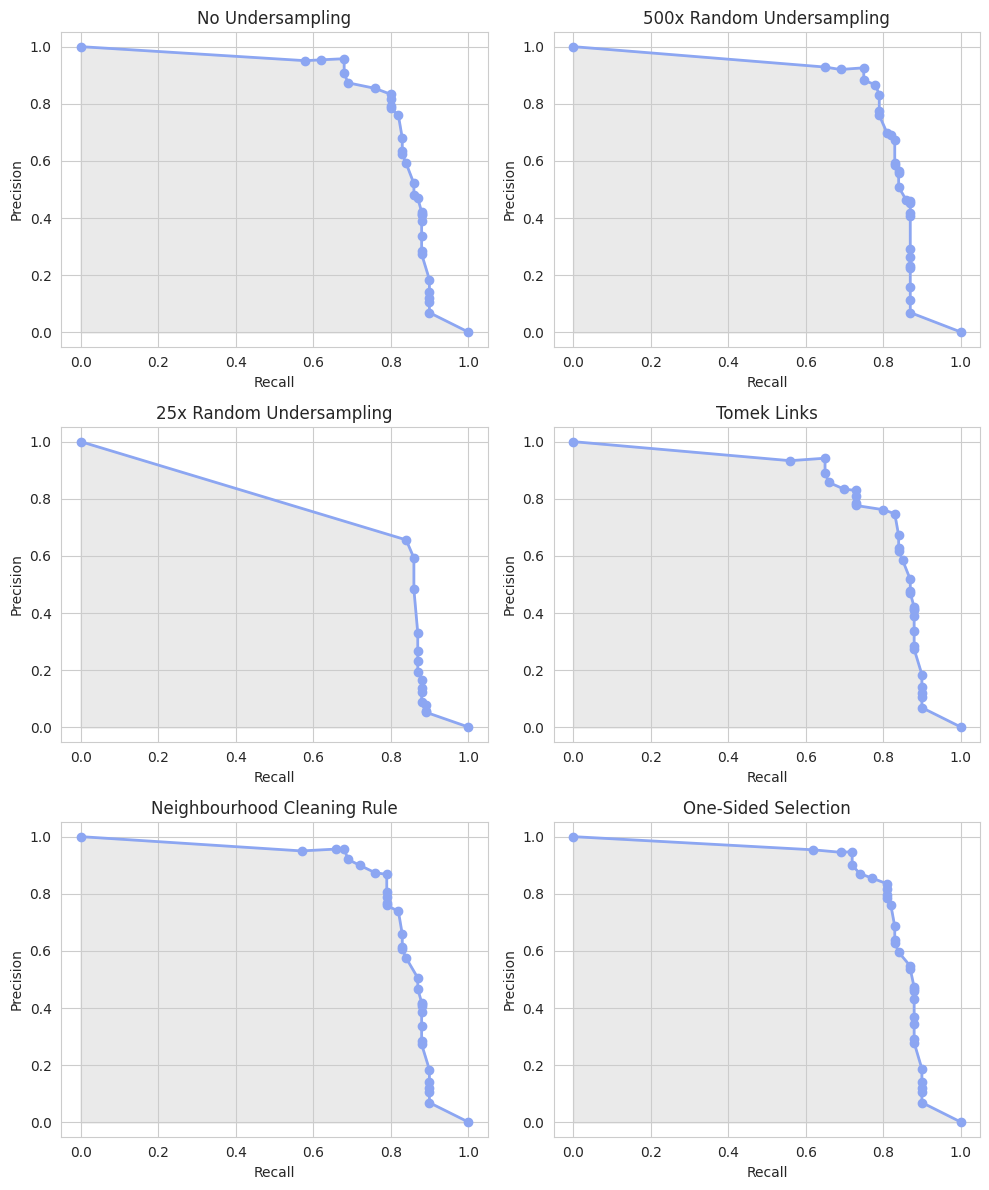

In [24]:
from sklearn.metrics import precision_recall_curve

prob_list = [y_prob, y_prob_rus1, y_prob_rus2, y_prob_tomek, y_prob_ncr, y_prob_oss]
names = ["No Undersampling", f"{ratios[0]}x Random Undersampling", f"{ratios[1]}x Random Undersampling", "Tomek Links", "Neighbourhood Cleaning Rule", "One-Sided Selection"]

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
axes = ax.flatten()

for i, prob in enumerate(prob_list):
    precision, recall, thresholds = precision_recall_curve(y_test, prob)

    axes[i].plot(recall, precision, marker='.', color=blue_color, linewidth=2, markersize=12)
    axes[i].fill_between(recall, precision, alpha=0.4, color=gray_color)
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].set_title(names[i])

plt.tight_layout()
plt.show()

#### Observations:
- Our OSS trained model has achieved the best average precision score, meaning it has the greatest area under the precision-recall curve, meaning it's likely we will have the best model selection from this however it's possible there are still models trained from different undersampling methods that perform better for our use-case.
- No model beat the high precision model from the model trained on normal data with no undersampling.
- OSS improved the best balanced model, with precision of 0.833 and recall of 0.81.
- OSS also improved the high recall model, with precision of 0.537 and recall of 0.87.

# Oversampling Techniques
Oversampling aims to train the model on a more balanced dataset by increasing the minority class instances. In our case, this is equivalent to training a fraud detecting supervisor on datasets where we have artificially increased the number of fraudulent transactions in the dataset, without changing the number of normal transactions. Since the supervisor is exposed to more fraud cases during their training, they are likely to better remember what fraud cases look like, compared to supervisors trained on datasets with fewer fraudulent transactions.

The result of oversampling in theory is very similar to the result of undersampling; we expect an increase in recall and slight loss in precision.

## Oversampling method: Random oversampling
This method is quite straightforward and involves randomly duplicating instances from the minority class to increase its representation. While simple to implement, random oversampling can lead to overfitting, as it creates exact replicas of existing instances from the minority class. As a result, the model may become too specialized in identifying the specific instances in the training data, making it less effective at generalizing to new, unseen instances.

We're going to try various oversampling ratios, where we're adjusting the ratio of non-fraudulent transactions to fraudulent transactions.

In [25]:
from imblearn.over_sampling import RandomOverSampler

ratios = [100, 50, 25, 15, 10, 5, 2, 1]

report_df = None

ros = RandomOverSampler(sampling_strategy='auto')
dtc = create_dtree(prob=True)

for ratio in ratios:
    num_minority_samples = int(y_train.sum() * ratio)
    ros = RandomOverSampler(sampling_strategy={0: y_train[y_train == 0].shape[0], 1: num_minority_samples}, random_state=42)
    
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
    dtc.fit(X_train_resampled, y_train_resampled)
    
    y_pred = dtc.predict(X_test)
    y_prob = dtc.custom_predict(X_test)
    
    if report_df is None:
        report_df = classification_report(y_test, y_pred, y_prob, f"{ratio}x oversampled")
    else:
        report_df = pd.concat([report_df, classification_report(y_test, y_pred, y_prob, f"{ratio}x oversampled")], axis=0)
    
report_df['Ratio'] = ratios
report_df

,Accuracy,Recall,Precision,Specificity,F1,Avg Precision,Ratio
100x oversampled,0.996679,0.83,0.321705,0.996968,0.463687,0.734142,100
50x oversampled,0.996610,0.84,0.318182,0.996881,0.461538,0.712944,50
25x oversampled,0.997025,0.86,0.352459,0.997262,0.500000,0.692076,25
15x oversampled,0.998858,0.84,0.626866,0.999134,0.717949,0.639124,15
10x oversampled,0.998564,0.80,0.559441,0.998908,0.658436,0.706420,10
5x oversampled,0.998962,0.79,0.669492,0.999324,0.724771,0.739227,5
2x oversampled,0.999274,0.79,0.790000,0.999636,0.790000,0.747138,2
1x oversampled,0.999377,0.80,0.833333,0.999723,0.816327,0.800055,1


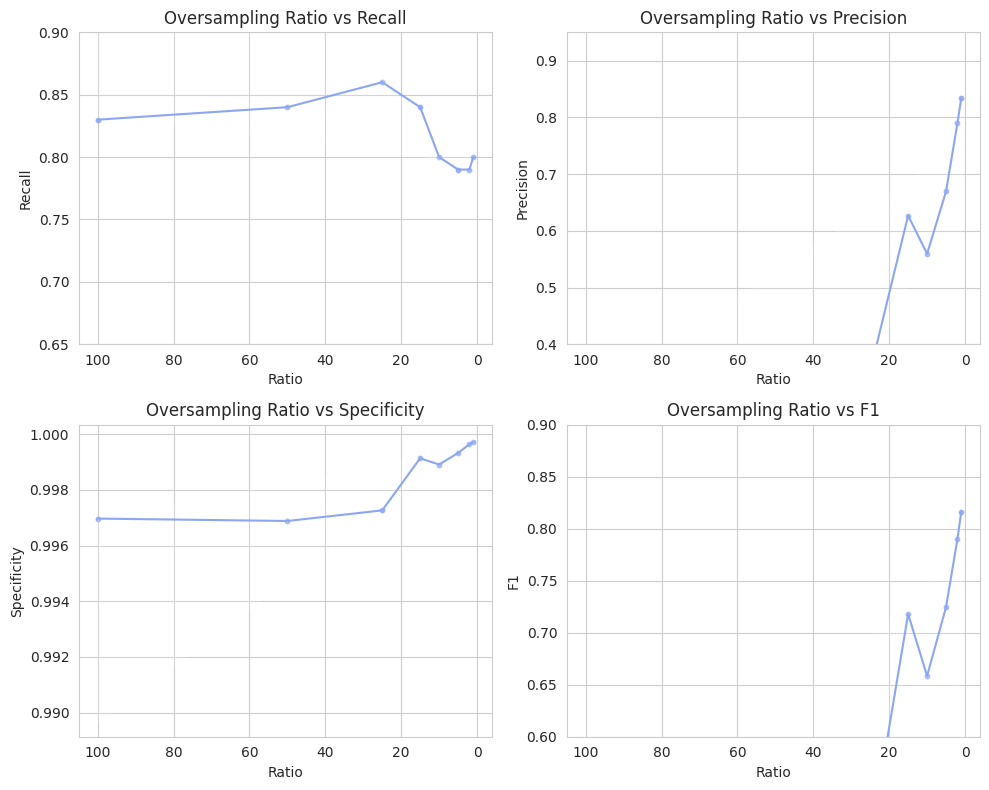

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Ratio against Recall
sns.regplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], color=blue_color)
axes[0, 0].invert_xaxis() # flip the x-axis
axes[0, 0].set_ylim([0.65, 0.9]) # set y-axis limits
axes[0, 0].set_title("Oversampling Ratio vs Recall")

# Ratio against Precision
sns.regplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], color=blue_color)
axes[0, 1].invert_xaxis() # flip the x-axis
axes[0, 1].set_ylim([0.4, 0.95]) # set y-axis limits
axes[0, 1].set_title("Oversampling Ratio vs Precision")

# Ratio against Specificity
sns.regplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], color=blue_color)
axes[1, 0].invert_xaxis() # flip the x-axis
axes[1, 0].set_title("Oversampling Ratio vs Specificity")

# Ratio against F1
sns.regplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], color=blue_color)
axes[1, 1].invert_xaxis() # flip the x-axis
axes[1, 1].set_ylim([0.6, 0.9]) # set y-axis limits
axes[1, 1].set_title("Oversampling Ratio vs F1")

plt.tight_layout()
plt.show()

#### Observations:
- We can see that a 10x random oversampling gives us the highest boost to recall, however precision suffers greatly.
- Overall, random oversampling does not appear to be a particularly useful method on this dataset.

## Oversampling method: SMOTE (Synthetic Minority Over-sampling Technique)
Dealing with imbalanced datasets often requires a more sophisticated approach to balance the classes. SMOTE is one such technique that aims to balance the dataset by generating synthetic instances of the minority class, rather than relying on simple duplication or removal of instances as in random oversampling or undersampling.

SMOTE works by selecting instances from the minority class that are close in the feature space and generating synthetic instances between them. By doing so, it creates a more diverse and representative set of instances for the minority class, which can improve the model's ability to generalize to unseen instances.

This method not only addresses the issue of imbalance but also helps to reduce the risk of overfitting that might occur with random oversampling. In addition, it prevents the loss of potentially important information that can occur with random undersampling. By incorporating SMOTE into the training process, we can develop a more robust fraud detection model that is better equipped to identify suspicious activities while maintaining a reasonable number of false positives.

In [27]:
from imblearn.over_sampling import SMOTE

ratios = [10, 8, 5, 4, 3, 2, 1]

report_df = None
dtc = create_dtree(prob=True)

for ratio in ratios:
    num_minority_samples = int(y_train.sum() * ratio)
    smote = SMOTE(sampling_strategy={0: y_train[y_train == 0].shape[0], 1: num_minority_samples}, random_state=42)
    
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    dtc.fit(X_train_resampled, y_train_resampled)

    y_pred = dtc.predict(X_test)
    y_prob = dtc.custom_predict(X_test)

    if report_df is None:
        report_df = classification_report(y_test, y_pred, y_prob, f"{ratio}x SMOTE oversampled")
    else:
        report_df = pd.concat([report_df, classification_report(y_test, y_pred, y_prob, f"{ratio}x SMOTE oversampled")], axis=0)
    
report_df['Ratio'] = ratios
report_df

,Accuracy,Recall,Precision,Specificity,F1,Avg Precision,Ratio
10x SMOTE oversampled,0.998910,0.84,0.641221,0.999186,0.727273,0.734928,10
8x SMOTE oversampled,0.998824,0.81,0.623077,0.999151,0.704348,0.705260,8
5x SMOTE oversampled,0.999187,0.84,0.730435,0.999463,0.781395,0.731357,5
4x SMOTE oversampled,0.999256,0.81,0.771429,0.999584,0.790244,0.745607,4
3x SMOTE oversampled,0.999291,0.83,0.775701,0.999584,0.801932,0.798915,3
2x SMOTE oversampled,0.999187,0.81,0.743119,0.999515,0.775120,0.743924,2
1x SMOTE oversampled,0.999377,0.80,0.833333,0.999723,0.816327,0.800055,1


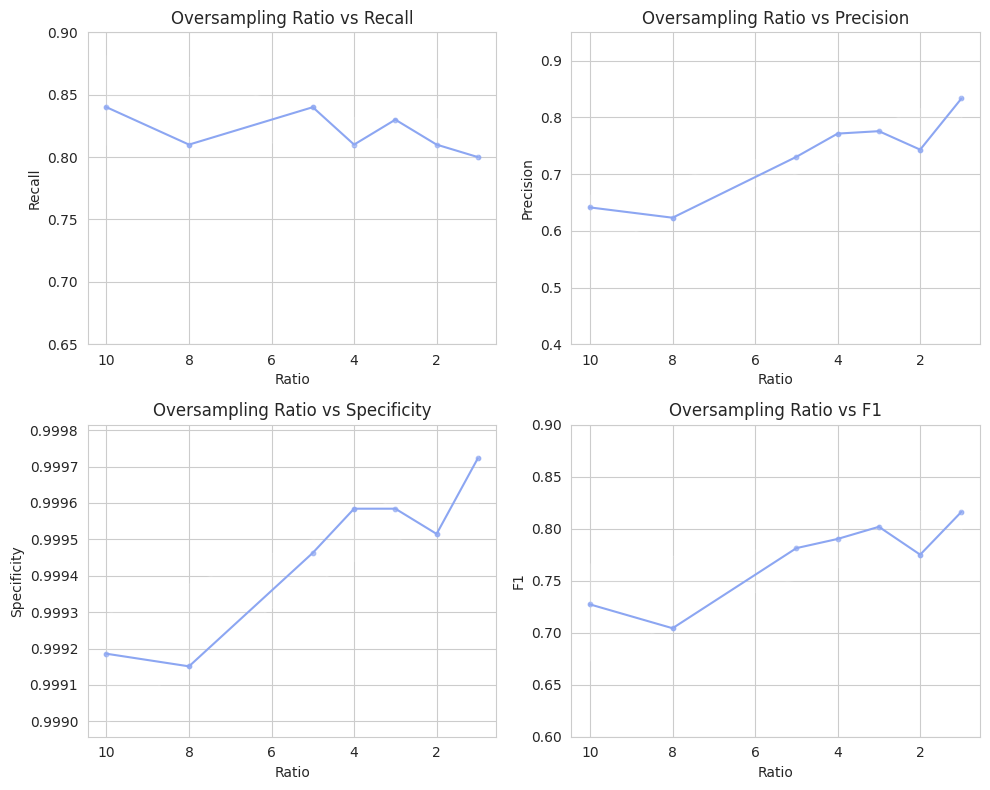

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Ratio against Recall
sns.regplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], color=blue_color)
axes[0, 0].invert_xaxis() # flip the x-axis
axes[0, 0].set_ylim([0.65, 0.9]) # set y-axis limits
axes[0, 0].set_title("Oversampling Ratio vs Recall")

# Ratio against Precision
sns.regplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], color=blue_color)
axes[0, 1].invert_xaxis() # flip the x-axis
axes[0, 1].set_ylim([0.4, 0.95]) # set y-axis limits
axes[0, 1].set_title("Oversampling Ratio vs Precision")

# Ratio against Specificity
sns.regplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], color=blue_color)
axes[1, 0].invert_xaxis() # flip the x-axis
axes[1, 0].set_title("Oversampling Ratio vs Specificity")

# Ratio against F1
sns.regplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], color=blue_color)
axes[1, 1].invert_xaxis() # flip the x-axis
axes[1, 1].set_ylim([0.6, 0.9]) # set y-axis limits
axes[1, 1].set_title("Oversampling Ratio vs F1")

# Adjust the layout
plt.tight_layout()
plt.show()

## Borderline SMOTE
Borderline SMOTE focuses on the instances of the minority class that are close to the border separating the two classes in the feature space. It generates synthetic instances by interpolating between the selected minority instances and their nearest majority class neighbors. This approach emphasizes the regions where the two classes are not well-separated, making the classifier more capable of identifying the subtle differences between them.

By concentrating on the borderline instances, this method enhances the classifier's ability to discern between the classes while maintaining the balance between false positives and true positives. Borderline SMOTE not only mitigates the imbalance issue but also aids in reducing the risk of overfitting that may arise with simple random oversampling. Additionally, it preserves valuable information that could be lost with random undersampling. By incorporating Borderline SMOTE into our training process, we can build a more sophisticated fraud detection model that effectively identifies suspicious activities while keeping false positives at a manageable level.

In [29]:
from imblearn.over_sampling import BorderlineSMOTE

ratios = [100, 50, 25, 15, 10, 5, 2, 1]

report_df = None

# Initialize the classifier we want to use
dtc = create_dtree(prob=True)

for ratio in ratios:
    # Calculate the number of minority class samples for the current ratio
    num_minority_samples = int(y_train.sum() * ratio)

    # Perform BorderlineSMOTE oversampling with the given ratio
    bsmote = BorderlineSMOTE(sampling_strategy={0: y_train[y_train == 0].shape[0], 1: num_minority_samples}, random_state=42)
    X_train_resampled, y_train_resampled = bsmote.fit_resample(X_train, y_train)

    # Train the model on the resampled dataset
    dtc.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test dataset
    y_pred = dtc.predict(X_test)
    y_prob = dtc.custom_predict(X_test)

    if report_df is None:
        report_df = classification_report(y_test, y_pred, y_prob, f"{ratio}x BorderlineSMOTE oversampled")
    else:
        report_df = pd.concat([report_df, classification_report(y_test, y_pred, y_prob, f"{ratio}x BorderlineSMOTE oversampled")], axis=0)

report_df['Ratio'] = ratios
report_df

,Accuracy,Recall,Precision,Specificity,F1,Avg Precision,Ratio
100x BorderlineSMOTE oversampled,0.999325,0.77,0.827957,0.999723,0.797927,0.715484,100
50x BorderlineSMOTE oversampled,0.999395,0.80,0.842105,0.999740,0.820513,0.765270,50
25x BorderlineSMOTE oversampled,0.999325,0.81,0.801980,0.999653,0.805970,0.759395,25
15x BorderlineSMOTE oversampled,0.999464,0.83,0.855670,0.999757,0.842640,0.780703,15
10x BorderlineSMOTE oversampled,0.999256,0.76,0.800000,0.999671,0.779487,0.710435,10
5x BorderlineSMOTE oversampled,0.999308,0.79,0.806122,0.999671,0.797980,0.765625,5
2x BorderlineSMOTE oversampled,0.999360,0.76,0.853933,0.999775,0.804233,0.784109,2
1x BorderlineSMOTE oversampled,0.999377,0.80,0.833333,0.999723,0.816327,0.800055,1


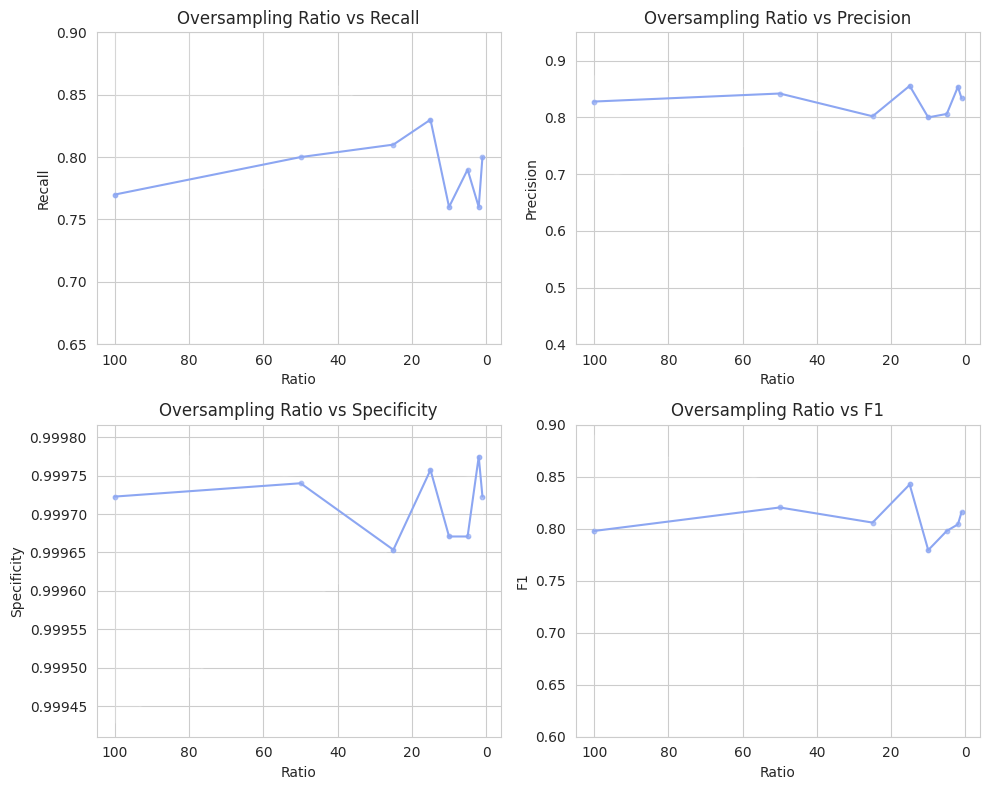

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Ratio against Recall
sns.regplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], color=blue_color)
axes[0, 0].invert_xaxis() # flip the x-axis
axes[0, 0].set_ylim([0.65, 0.9]) # set y-axis limits
axes[0, 0].set_title("Oversampling Ratio vs Recall")

# Ratio against Precision
sns.regplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], color=blue_color)
axes[0, 1].invert_xaxis() # flip the x-axis
axes[0, 1].set_ylim([0.4, 0.95]) # set y-axis limits
axes[0, 1].set_title("Oversampling Ratio vs Precision")

# Ratio against Specificity
sns.regplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], color=blue_color)
axes[1, 0].invert_xaxis() # flip the x-axis
axes[1, 0].set_title("Oversampling Ratio vs Specificity")

# Ratio against F1
sns.regplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], color=blue_color)
axes[1, 1].invert_xaxis() # flip the x-axis
axes[1, 1].set_ylim([0.6, 0.9]) # set y-axis limits
axes[1, 1].set_title("Oversampling Ratio vs F1")

# Adjust the layout
plt.tight_layout()
plt.show()

# Conclusion
In this notebook, we explored various techniques to tackle the imbalanced dataset problem for a fraud detection task. We started by visualizing the dataset and understanding the class imbalance. To address this issue, we experimented with different approaches including undersampling, oversampling, and synthetic sample generation using SMOTE and its variants.

We evaluated the impact of undersampling and oversampling methods on the performance of our classifiers. We found that some techniques led to improved recall, which is crucial in fraud detection, at the expense of precision. This trade-off is an important consideration when deploying such models in a real-world scenario, as it can affect the number of false alarms generated.

In conclusion, addressing class imbalance is essential for building effective classifiers in fraud detection tasks. By exploring various resampling techniques and adjusting model hyperparameters, we can achieve a balance between precision and recall, allowing us to create a more reliable and accurate fraud detection system. Additionally, dimensionality reduction techniques such as PCA can help in simplifying the models and improving their interpretability.